# Import Library

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression

# Read Data

In [19]:
data = pd.read_csv("malaria.csv")
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X120,X121,X122,X123,X124,X125,X126,X127,X128,activity
0,0,0.076360,-0.017963,-0.041079,0.032744,0.026876,-0.013251,0.012844,-0.015637,0.013579,...,-0.002356,-0.024190,-0.026568,0.048401,-0.010332,-0.050905,0.037155,-0.055883,-0.001739,0.738598
1,1,0.087906,-0.021278,-0.055732,0.043131,0.041534,-0.010785,0.017838,-0.020033,0.017920,...,0.008207,-0.027432,-0.025528,0.062203,-0.019774,-0.069155,0.029552,-0.066313,-0.007797,-1.090085
2,2,0.083905,-0.027958,-0.058104,0.052989,0.043250,-0.014711,0.019079,-0.026991,0.019388,...,0.009689,-0.031705,-0.035554,0.046045,-0.027589,-0.050722,0.029901,-0.072912,0.003168,-0.358682
3,3,0.078050,-0.031266,-0.052941,0.034495,0.029298,-0.007183,0.018254,-0.026949,0.015953,...,0.000058,-0.022599,-0.030457,0.042340,-0.027678,-0.053219,0.035680,-0.062428,-0.007000,0.561329
4,4,0.092521,-0.035803,-0.067008,0.047054,0.038388,-0.008419,0.021455,-0.032326,0.028549,...,0.003027,-0.038423,-0.038319,0.058349,-0.014845,-0.058713,0.038446,-0.079934,-0.016107,-1.371137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,0.075947,-0.025024,-0.042754,0.037043,0.031060,-0.009335,0.016484,-0.017851,0.016260,...,0.005771,-0.029885,-0.036244,0.058195,-0.016978,-0.055879,0.030683,-0.066922,-0.007714,-0.080391
9995,9995,0.091916,-0.031116,-0.071031,0.058488,0.048584,-0.013237,0.021319,-0.036730,0.029506,...,0.006088,-0.030893,-0.049425,0.077445,-0.018297,-0.067630,0.047367,-0.084142,-0.010130,0.260054
9996,9996,0.071470,-0.029818,-0.042899,0.034686,0.030400,-0.012769,0.020879,-0.022213,0.029111,...,0.002564,-0.020431,-0.031292,0.046925,-0.020065,-0.060083,0.029586,-0.052622,-0.000799,-0.549581
9997,9997,0.078754,-0.033351,-0.058027,0.042672,0.038334,-0.008801,0.010339,-0.019867,0.032179,...,0.008075,-0.021430,-0.037007,0.066161,-0.018958,-0.055961,0.028663,-0.073419,-0.003970,-0.398880


In [20]:
data_x = data[data.columns[:-1]]
data_y = data[data.columns[-1]]

In [21]:
data_x

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128
0,0,0.076360,-0.017963,-0.041079,0.032744,0.026876,-0.013251,0.012844,-0.015637,0.013579,...,0.017224,-0.002356,-0.024190,-0.026568,0.048401,-0.010332,-0.050905,0.037155,-0.055883,-0.001739
1,1,0.087906,-0.021278,-0.055732,0.043131,0.041534,-0.010785,0.017838,-0.020033,0.017920,...,0.013991,0.008207,-0.027432,-0.025528,0.062203,-0.019774,-0.069155,0.029552,-0.066313,-0.007797
2,2,0.083905,-0.027958,-0.058104,0.052989,0.043250,-0.014711,0.019079,-0.026991,0.019388,...,0.017921,0.009689,-0.031705,-0.035554,0.046045,-0.027589,-0.050722,0.029901,-0.072912,0.003168
3,3,0.078050,-0.031266,-0.052941,0.034495,0.029298,-0.007183,0.018254,-0.026949,0.015953,...,0.019562,0.000058,-0.022599,-0.030457,0.042340,-0.027678,-0.053219,0.035680,-0.062428,-0.007000
4,4,0.092521,-0.035803,-0.067008,0.047054,0.038388,-0.008419,0.021455,-0.032326,0.028549,...,0.023231,0.003027,-0.038423,-0.038319,0.058349,-0.014845,-0.058713,0.038446,-0.079934,-0.016107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,0.075947,-0.025024,-0.042754,0.037043,0.031060,-0.009335,0.016484,-0.017851,0.016260,...,0.012308,0.005771,-0.029885,-0.036244,0.058195,-0.016978,-0.055879,0.030683,-0.066922,-0.007714
9995,9995,0.091916,-0.031116,-0.071031,0.058488,0.048584,-0.013237,0.021319,-0.036730,0.029506,...,0.020780,0.006088,-0.030893,-0.049425,0.077445,-0.018297,-0.067630,0.047367,-0.084142,-0.010130
9996,9996,0.071470,-0.029818,-0.042899,0.034686,0.030400,-0.012769,0.020879,-0.022213,0.029111,...,0.017200,0.002564,-0.020431,-0.031292,0.046925,-0.020065,-0.060083,0.029586,-0.052622,-0.000799
9997,9997,0.078754,-0.033351,-0.058027,0.042672,0.038334,-0.008801,0.010339,-0.019867,0.032179,...,0.017376,0.008075,-0.021430,-0.037007,0.066161,-0.018958,-0.055961,0.028663,-0.073419,-0.003970


In [22]:
data_y

0       0.738598
1      -1.090085
2      -0.358682
3       0.561329
4      -1.371137
          ...   
9994   -0.080391
9995    0.260054
9996   -0.549581
9997   -0.398880
9998   -0.135479
Name: activity, Length: 9999, dtype: float64

# Simple Cleaning

In [23]:
data_x = data_x.drop(columns=data.columns[0], axis=1)

In [24]:
data = data.drop(columns=data.columns[0], axis=1)

# EDA

In [25]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X120,X121,X122,X123,X124,X125,X126,X127,X128,activity
0,0.076360,-0.017963,-0.041079,0.032744,0.026876,-0.013251,0.012844,-0.015637,0.013579,-0.039947,...,-0.002356,-0.024190,-0.026568,0.048401,-0.010332,-0.050905,0.037155,-0.055883,-0.001739,0.738598
1,0.087906,-0.021278,-0.055732,0.043131,0.041534,-0.010785,0.017838,-0.020033,0.017920,-0.037166,...,0.008207,-0.027432,-0.025528,0.062203,-0.019774,-0.069155,0.029552,-0.066313,-0.007797,-1.090085
2,0.083905,-0.027958,-0.058104,0.052989,0.043250,-0.014711,0.019079,-0.026991,0.019388,-0.034889,...,0.009689,-0.031705,-0.035554,0.046045,-0.027589,-0.050722,0.029901,-0.072912,0.003168,-0.358682
3,0.078050,-0.031266,-0.052941,0.034495,0.029298,-0.007183,0.018254,-0.026949,0.015953,-0.036119,...,0.000058,-0.022599,-0.030457,0.042340,-0.027678,-0.053219,0.035680,-0.062428,-0.007000,0.561329
4,0.092521,-0.035803,-0.067008,0.047054,0.038388,-0.008419,0.021455,-0.032326,0.028549,-0.047674,...,0.003027,-0.038423,-0.038319,0.058349,-0.014845,-0.058713,0.038446,-0.079934,-0.016107,-1.371137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0.075947,-0.025024,-0.042754,0.037043,0.031060,-0.009335,0.016484,-0.017851,0.016260,-0.032105,...,0.005771,-0.029885,-0.036244,0.058195,-0.016978,-0.055879,0.030683,-0.066922,-0.007714,-0.080391
9995,0.091916,-0.031116,-0.071031,0.058488,0.048584,-0.013237,0.021319,-0.036730,0.029506,-0.043371,...,0.006088,-0.030893,-0.049425,0.077445,-0.018297,-0.067630,0.047367,-0.084142,-0.010130,0.260054
9996,0.071470,-0.029818,-0.042899,0.034686,0.030400,-0.012769,0.020879,-0.022213,0.029111,-0.034305,...,0.002564,-0.020431,-0.031292,0.046925,-0.020065,-0.060083,0.029586,-0.052622,-0.000799,-0.549581
9997,0.078754,-0.033351,-0.058027,0.042672,0.038334,-0.008801,0.010339,-0.019867,0.032179,-0.032972,...,0.008075,-0.021430,-0.037007,0.066161,-0.018958,-0.055961,0.028663,-0.073419,-0.003970,-0.398880


In [26]:
data.dtypes

X1          float64
X2          float64
X3          float64
X4          float64
X5          float64
             ...   
X125        float64
X126        float64
X127        float64
X128        float64
activity    float64
Length: 129, dtype: object

In [27]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       ...
       'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128',
       'activity'],
      dtype='object', length=129)

In [28]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X120,X121,X122,X123,X124,X125,X126,X127,X128,activity
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.088690,-0.031767,-0.058811,0.047946,0.040029,-0.008488,0.018544,-0.024425,0.027503,-0.041785,...,0.005135,-0.030644,-0.036463,0.060495,-0.025139,-0.064507,0.039836,-0.073413,-0.007071,-0.344021
std,0.016375,0.007908,0.012514,0.010139,0.008137,0.005022,0.006261,0.007711,0.007503,0.008150,...,0.004996,0.008848,0.008745,0.011881,0.006760,0.012732,0.009848,0.014878,0.005525,1.215321
min,0.051274,-0.066078,-0.116528,0.024035,0.019785,-0.027276,0.001554,-0.062032,0.008493,-0.077934,...,-0.011832,-0.072774,-0.077952,0.033624,-0.057160,-0.130364,0.014477,-0.146495,-0.025906,-6.921854
25%,0.076943,-0.036821,-0.066192,0.040614,0.034187,-0.012464,0.013941,-0.029610,0.022019,-0.046849,...,0.001173,-0.035909,-0.041960,0.051771,-0.029374,-0.071710,0.032756,-0.082282,-0.011120,-0.785262
50%,0.085543,-0.031154,-0.056912,0.046652,0.039257,-0.008509,0.018338,-0.024123,0.026960,-0.041140,...,0.005185,-0.029734,-0.035680,0.059159,-0.024634,-0.062320,0.039164,-0.071368,-0.007110,-0.217993
75%,0.097077,-0.026093,-0.049689,0.053863,0.044831,-0.004491,0.022777,-0.019001,0.032052,-0.036000,...,0.009161,-0.024247,-0.030273,0.067828,-0.020247,-0.055152,0.046210,-0.062333,-0.002904,0.083422
max,0.188771,-0.012848,-0.032292,0.099128,0.087521,0.008466,0.047202,-0.002577,0.062969,-0.021540,...,0.025268,-0.007765,-0.013882,0.123927,-0.007818,-0.036802,0.087552,-0.037997,0.009360,2.708050


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 129 entries, X1 to activity
dtypes: float64(129)
memory usage: 9.8 MB


In [30]:
data.shape

(9999, 129)

In [31]:
# for column in data.columns[:-1]:
#     if (data[column].dtype != "object"):
#         sns.histplot(data=data, x=column)
#         plt.show()

In [32]:
# for column in data.columns[:-1]:
#     if (data[column].dtype != "object"):
#         sns.boxplot(data=data, x=column)
#         plt.show()

In [33]:
# for column in data.columns[:-1]:
#     if (data[column].dtype != "object"):
#         sns.scatterplot(data=data, x=column, y="activity")
#         plt.show()

In [34]:
# for column in data.columns[:-1]:
#     if (data[column].dtype != "object"):
#         print (f"Column: {column}, Skewness: {data[column].skew()}, Kurtosis: {data[column].kurt()}")

In [35]:
for column in data.columns[:-1]:
    if (data[column].dtype == "object"):
        print (f"Column = {column}")

<Axes: >

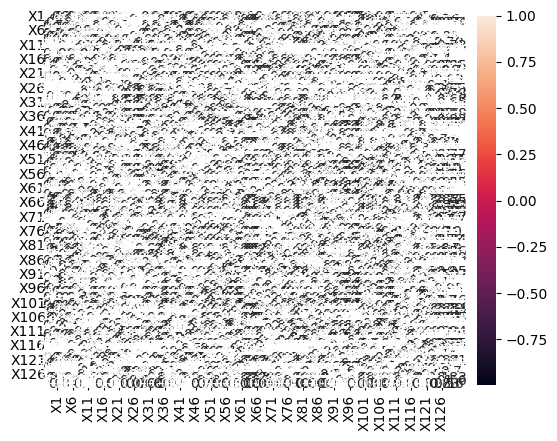

In [39]:
sns.heatmap(data=data[:5].corr(), annot=True)

# Data Preprocessing

In [40]:
data.isna().sum()

X1          0
X2          0
X3          0
X4          0
X5          0
           ..
X125        0
X126        0
X127        0
X128        0
activity    0
Length: 129, dtype: int64

In [42]:
missing_value = data.isna().sum() / len(data) * 100
missing_value

X1          0.0
X2          0.0
X3          0.0
X4          0.0
X5          0.0
           ... 
X125        0.0
X126        0.0
X127        0.0
X128        0.0
activity    0.0
Length: 129, dtype: float64

In [43]:
for key, value in missing_value.items():
    if (value > 50):
        data = data.drop(columns=key, axis=1)